# Practice Kaggle Workflow with Training help

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

## Retrieve data

In [3]:
data_train = pd.read_csv("train.csv")
## 891 observations, 12 features
print(f'Shape of data_train {data_train.shape} \n')
print(f'Number of na \n {data_train.isna().sum()} \n')
print(f'Number of null \n {data_train.isnull().sum()} \n')

Shape of data_train (891, 12) 

Number of na 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Number of null 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [4]:
data_test = pd.read_csv("test.csv")
## 418 observations, 11 features
print(f'Shape of data {data_test.shape} \n')
print(f'Number of na \n {data_test.isna().sum()} \n')
print(f'Number of null \n {data_test.isnull().sum()} \n')

Shape of data (418, 11) 

Number of na 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 

Number of null 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



## Explore the data

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
## Unique values in column
data_train['Pclass'].unique()

array([3, 1, 2])

In [8]:
data_train['Survived'].value_counts()
## 549 died (0) reserved for negative vals
## 342 survived (1) reserved for positive vals

0    549
1    342
Name: Survived, dtype: int64

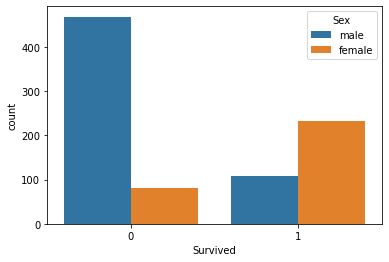

In [9]:
sns.countplot(x = 'Survived', hue='Sex', data=data_train);

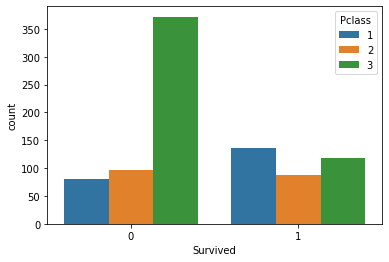

In [10]:
sns.countplot(x = 'Survived', hue='Pclass', data=data_train);

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

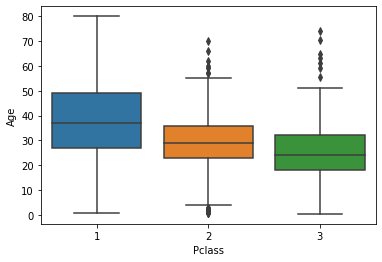

In [11]:
sns.boxplot(x='Pclass',y='Age',data=data_train)

In [12]:
## as age is numeric we can easily impute
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        ## get all occurences where class is equal to current record and find the mean in age of those records
        return int(data_train[data_train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
    
    
data_train['Age'] = data_train[['Age','Pclass']].apply(add_age,axis=1)
data_test['Age'] = data_test[['Age','Pclass']].apply(add_age,axis=1)

In [13]:
## as cabin is object (categorical), and theres lots of values, easier to drop cabin column (we do not need it)
data_train.drop("Cabin",inplace=True,axis=1)
data_test.drop("Cabin",inplace=True,axis=1)

In [16]:
## as embraked column is object (categorical), and there are not many values, can impute with mode
data_train['Embarked'].fillna(data_train['Embarked'].mode(), inplace=True)

In [61]:
data_train.shape

(891, 11)

<AxesSubplot:>

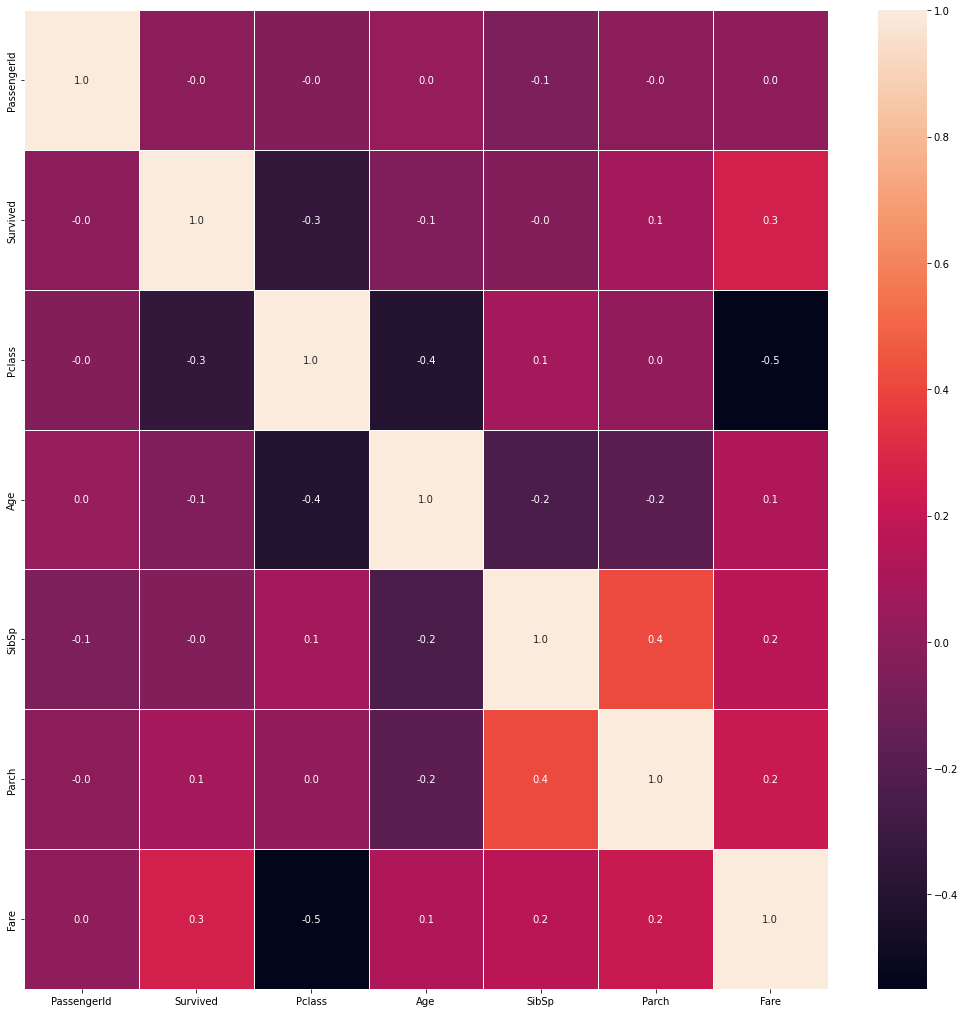

In [17]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

/Users/anasthasia_manu/ml_course/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


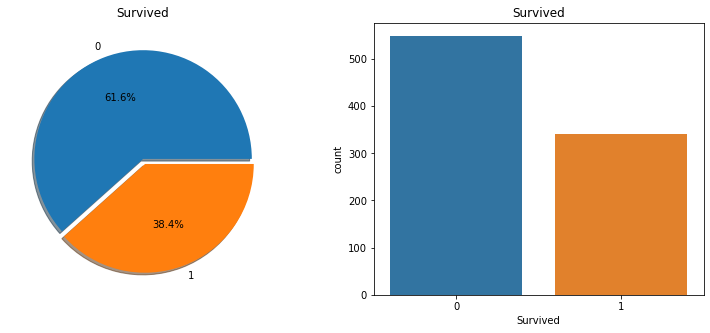

0    549
1    342
Name: Survived, dtype: int64


In [46]:
f, ax = plt.subplots(1,2, figsize=(13,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show();

print(data['Survived'].value_counts())